# Introduction

By. Dr. Vukosi Marivate http://www.vima.co.za

This notebook takes data from a crowdsourced phone datataset. You can see the original google form here 
http://bitly.com/phonepricedata

Some preprocessing has been done in Google spreadsheets. Namely standardizing all the Brands of the phones. In this notebook I do not remove outliers. I do remove submissions without all of the information (you could resolve this with data imputation).

In [1]:
import pandas as pd

In [49]:
#Lets plot in the notebook
%pylab inline
plt.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Loading the data that has been downloaded into an excel file. Weapon of choice is Pandas

In [3]:
df = pd.read_excel("../data/Sell_Your_Phone_Vukosi_Train.xlsx")

In [4]:
df.describe()

,Age,Buying_Price,Camera,Battery,Screen_Size,Condition,Proposed_Sell_Price,Internal Storage Size in Gigabytes (GB)
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,115.000000
mean,14.451613,4186.798387,7.184758,14.459677,4.362903,7.274194,2606.205645,11.210861
std,10.873519,3291.121481,4.289032,12.471365,0.924769,2.249982,2160.235391,10.054174
min,0.000000,160.000000,0.310000,1.000000,2.400000,2.000000,2.500000,0.049000
25%,6.000000,1800.000000,5.000000,6.000000,3.700000,6.000000,1000.000000,4.000000
50%,12.000000,3000.000000,5.000000,12.000000,4.500000,8.000000,2000.000000,8.000000
75%,21.000000,6000.000000,8.500000,18.250000,4.700000,9.000000,3600.000000,16.000000
max,48.000000,15576.000000,20.000000,72.000000,10.000000,10.000000,10000.000000,64.000000


Lets look at some of the data

In [5]:
df.head()

,Timestamp,Brand,Age,Buying_Price,Camera,Battery,Screen_Size,Condition,Proposed_Sell_Price,Broken_Screen,Internal Storage Size in Gigabytes (GB)
0,2015-12-09 18:05:54.559,Samsung,8,160,5.0,24,4.5,7,2000.0,No,8.0
1,2016-02-10 22:20:49.958,Sony,19,207,4.0,12,3.5,8,3000.0,No,5.0
2,2015-12-03 18:33:11.153,Samsung,9,250,2.0,4,3.5,5,200.0,No,2.0
3,2016-02-09 13:32:25.140,Nokia,19,650,2.0,14,3.5,9,400.0,No,1.0
4,2015-11-03 15:56:41.481,Vodafone,13,699,2.0,10,3.2,7,450.0,No,4.0


Drop any rows with missing values (this is extreme, you can also do data imputation)

In [6]:
df = df.dropna()
# Lets get rid of that timestamp 
df = df.drop(['Timestamp'],axis=1)

In [7]:
df.columns

Index([u'Brand', u'Age', u'Buying_Price', u'Camera', u'Battery',
       u'Screen_Size', u'Condition', u'Proposed_Sell_Price', u'Broken_Screen',
       u'Internal Storage Size in Gigabytes (GB)'],
      dtype='object')

In [51]:
#Some default stuff for my plotting
aspect_mult = 0.9
figsize(aspect_mult*16,aspect_mult*9)
linewidth = 3

It's always a good idea to take a look at your data. So do some exploratory data analysis. A simple question we can ask is how old are peoples phones? To answer that, we can plot a histogram. 

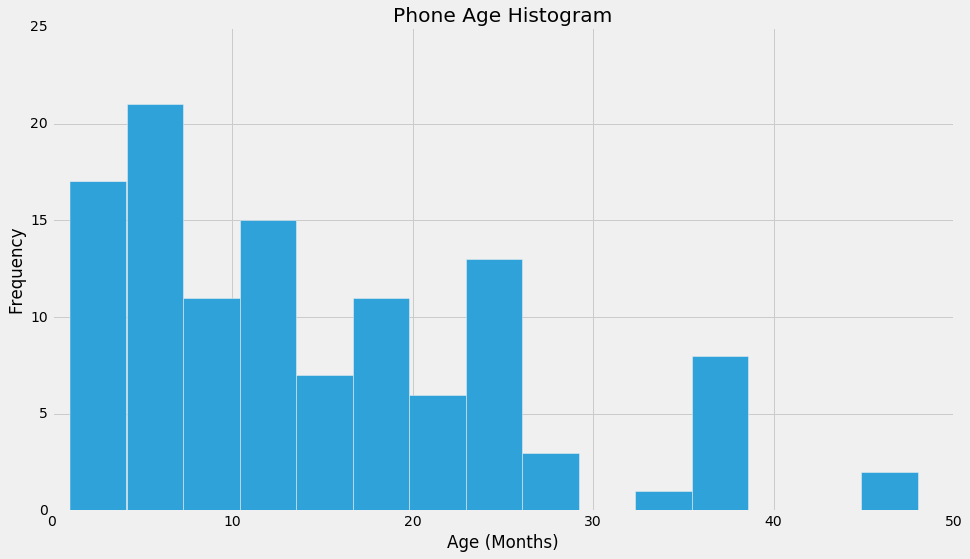

In [10]:
fig = pyplot.figure()
ax = fig.add_subplot(111) 
#Histogram from the pandas dataframe
df.Age.hist(bins=15)

#Add some context to the plot
plt.title("Phone Age Histogram")
plt.xlabel("Age (Months)")
plt.ylabel("Frequency")

A helper function to generate unique colors

In [11]:
import colorsys
import matplotlib.cm as cmx
import matplotlib.colors as colors


def get_cmap(N):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

Get the number of unique brands we have in our data and also map them to a unique color

In [12]:
unique_brands = list(df.Brand.unique())
print unique_brands

prop_colors_fn = get_cmap(len(unique_brands))

df['color'] = df.Brand.map(lambda x:prop_colors_fn(unique_brands.index(x)))

[u'Samsung', u'Sony ', u'Nokia', u'Vodafone', u'ZTE', u'BlackBerry', u'Apple', u'Huawei', u'Hisense', u'Alcatel onetouch', u'Infinix', u'Azpen', u'LG', u'Xiaomi', u'Sony', u'HTC']


The below plot is incomplete. Some work to be done on the legend :(

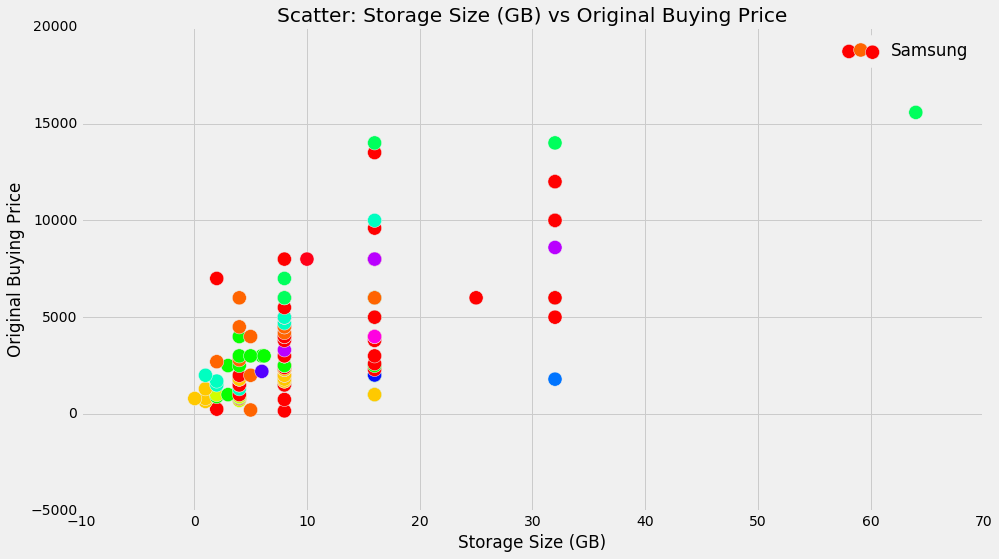

In [19]:
plt.scatter(df['Internal Storage Size in Gigabytes (GB)'], df.Buying_Price, 
            s = 200,c = df.color)
plt.legend(unique_brands)

#Add some context to the plot
plt.title("Scatter: Storage Size (GB) vs Original Buying Price")
plt.xlabel("Storage Size (GB)")
plt.ylabel("Original Buying Price")

Currently the data is not really in a nice format for Machine learning methods. Most methods don't deal well with categorical data (like Brand and Broken Screen)

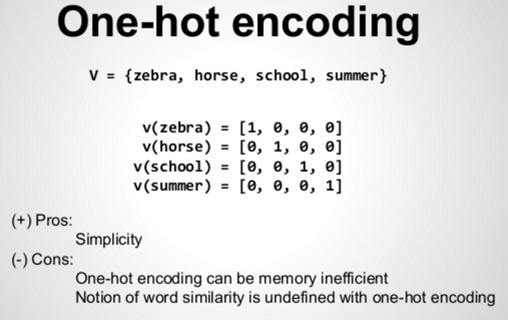

In [21]:
from IPython.display import Image
Image(filename='../figures/onehot.png') 
# src: http://www.slideshare.net/SergiiGavrylov/kpi-summer-school-2015-word-embeddings-and-neural-language-modeling

In [22]:
#One Hot Encoding
cat_cols = ["Brand","Broken_Screen"]
df_numbers = pd.get_dummies(df,columns=cat_cols)
df_numbers = df_numbers.drop(['color'],axis=1)
df_numbers.columns

Index([u'Age', u'Buying_Price', u'Camera', u'Battery', u'Screen_Size',
       u'Condition', u'Proposed_Sell_Price',
       u'Internal Storage Size in Gigabytes (GB)', u'Brand_Alcatel onetouch',
       u'Brand_Apple', u'Brand_Azpen', u'Brand_BlackBerry', u'Brand_HTC',
       u'Brand_Hisense', u'Brand_Huawei', u'Brand_Infinix', u'Brand_LG',
       u'Brand_Nokia', u'Brand_Samsung', u'Brand_Sony', u'Brand_Sony ',
       u'Brand_Vodafone', u'Brand_Xiaomi', u'Brand_ZTE', u'Broken_Screen_No',
       u'Broken_Screen_Yes'],
      dtype='object')

## Lets do some learning

In [23]:
# Get the X variable
df_X = df_numbers.drop(['Proposed_Sell_Price'],axis=1)

In [24]:
# Get the Y variable (the thing we will be trying to prodict)
y = df_numbers.Proposed_Sell_Price

How depedent are the variables on each other? Specifically what is the correlation of the output to all the other variables?

In [25]:
# np is numpy it was loaded with the %pylab magic earlier. So an import would be "import numpy as np"
corr_mat = np.corrcoef(df_numbers.values.T)

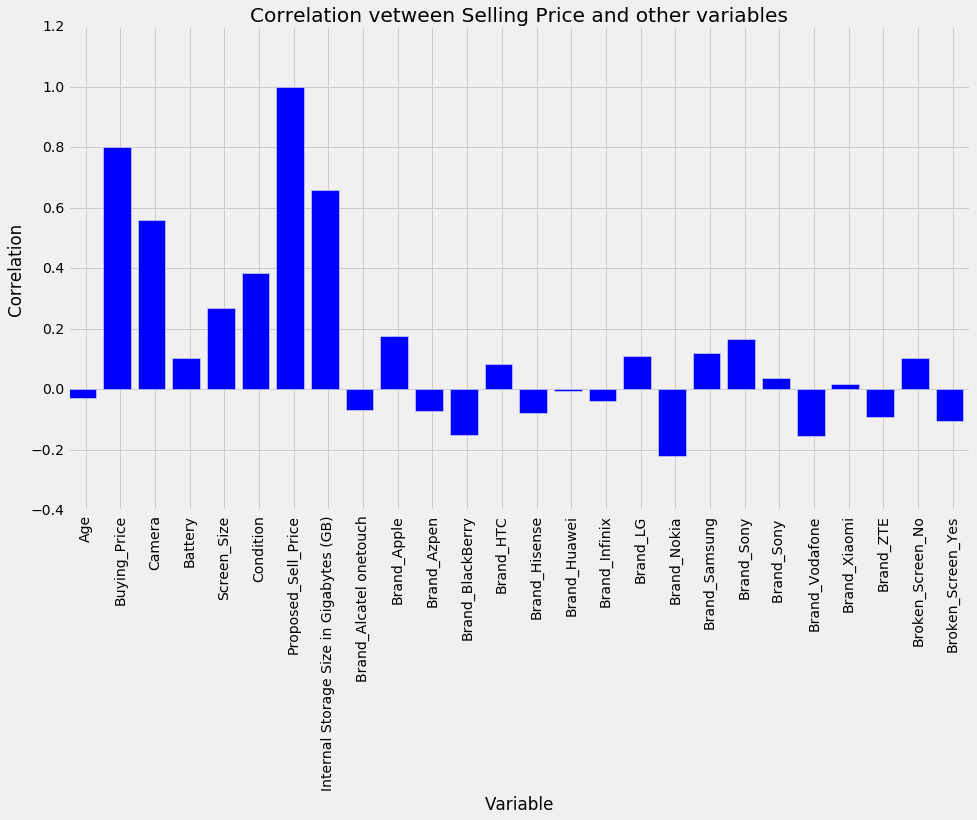

In [26]:
plt.bar(range(len(corr_mat[6])),corr_mat[6])
plt.xticks(np.arange(len(corr_mat[6]))+0.5,df_numbers.columns, rotation=90,fontsize=14)
plt.xlim(0,len(corr_mat[6]+1))
plt.title("Correlation vetween Selling Price and other variables")
plt.ylabel("Correlation")
plt.xlabel("Variable")

## The heavy lifting for Machine Learning: Scikit-Learn

In [27]:
from sklearn import cross_validation, linear_model
from sklearn.svm import SVR

### Mean Square Error (MSE) and Cross Validation

We need to know that we are doing something useful. So first we have to keep track of the erro between our real selling price and the price our method will have predicted. To do this and compare different appcoaches, we use MSE. There are other metrics, but for simplicity lets stic![alt text]k to this. 

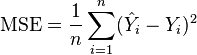

In [32]:
Image(filename='../figures/mse.png') 

Cross validation on the other hand is to make sure that we are not overfitting onto the dataset we have. So we split the data into training and testing sets repeatedly. As such we try to avoid fitting well to just one configuration of the data and as such increasing the general applicability of the model we will build.

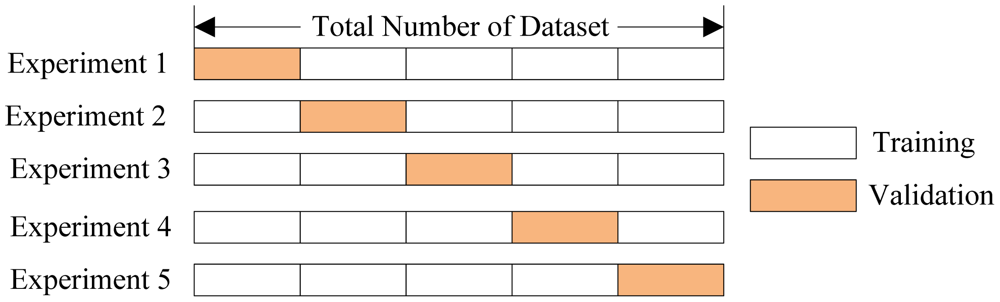

In [33]:
Image(filename='../figures/crossvalidation.png') 

### Training Linear Regression

In [44]:
regmod = linear_model.LinearRegression()
scores = cross_validation.cross_val_score(regmod,df_X,  y, scoring='mean_squared_error',cv=20)
print "Linear Regression (OLS), Mean: %s, STD: %s" %(scores.mean(), scores.std())

Linear Regression (OLS), Mean: -1846865.39274, STD: 3326604.30699


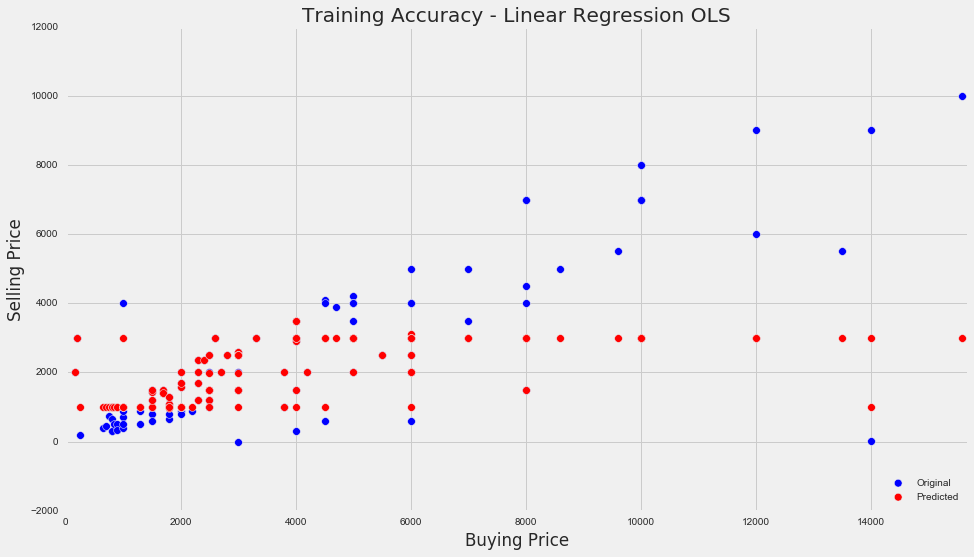

In [52]:
y_regmod = regmod.fit(df_X, y).predict(df_X)
plt.scatter(df_X.Buying_Price,y,c='b',s = 60, label="Original")
plt.scatter(df_X.Buying_Price,y_regmod,c='r',s = 60, label= "Predicted")
plt.xlim([0,max(y)+100])
plt.xlim([0,df.Buying_Price.max()+100])
plt.legend(loc=4)
plt.xlabel("Buying Price")
plt.ylabel("Selling Price")
plt.title("Training Accuracy - Linear Regression OLS")

Linear Regression (Ridge), Mean: -1829708.82901, STD: 3329508.23004


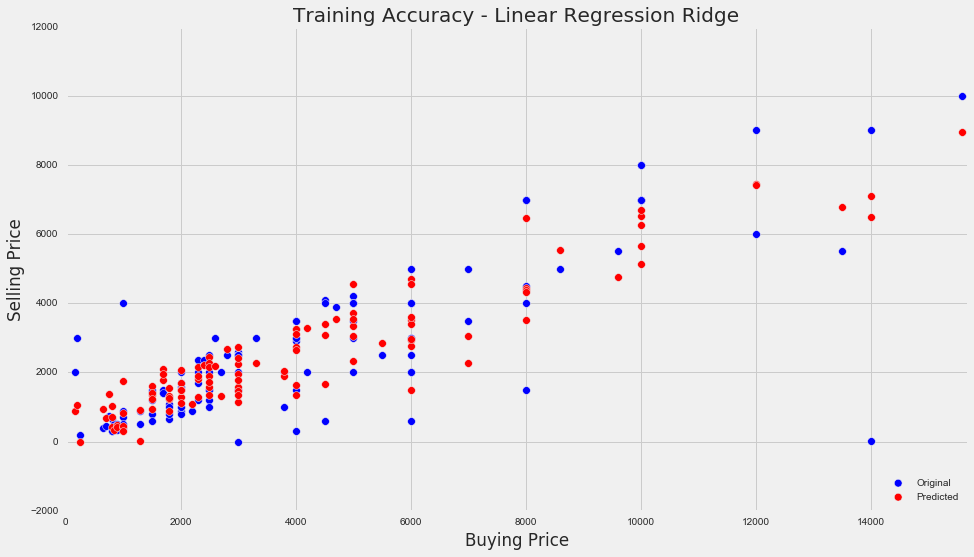

In [53]:
regmod = linear_model.Ridge(alpha = .5)
scores = cross_validation.cross_val_score(regmod,df_X,  y, scoring='mean_squared_error',cv=20)
print "Linear Regression (Ridge), Mean: %s, STD: %s" %(scores.mean(), scores.std())

y_regmod = regmod.fit(df_X, y).predict(df_X)
plt.scatter(df_X.Buying_Price,y,c='b',s = 60, label="Original")
plt.scatter(df_X.Buying_Price,y_regmod,c='r',s = 60, label="Predicted")
plt.xlim([0,max(y)+100])
plt.xlim([0,df.Buying_Price.max()+100])

plt.legend(loc=4)
plt.xlabel("Buying Price")
plt.ylabel("Selling Price")
plt.title("Training Accuracy - Linear Regression Ridge")

### Support Vector Regression

SVR Linear, Mean: -1837091.09332, STD: 3534255.15909


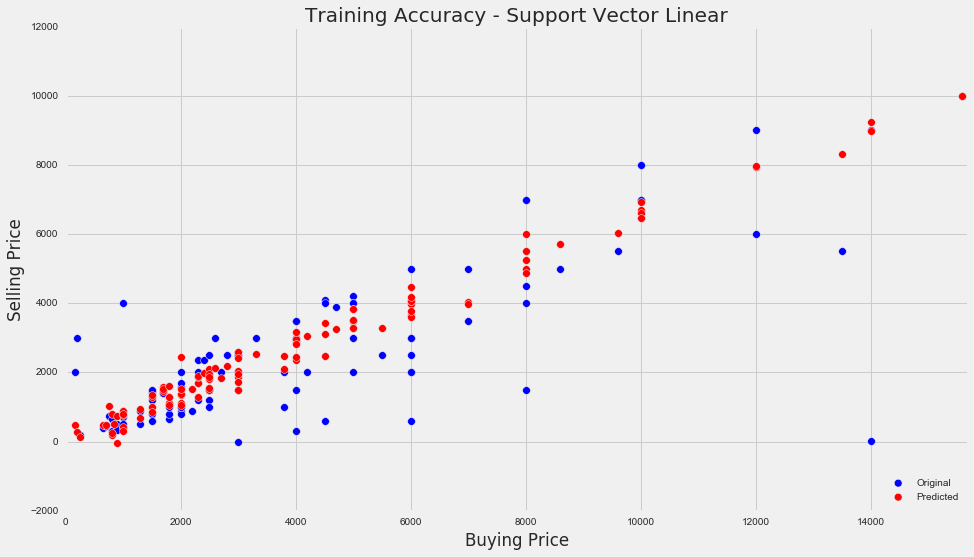

In [54]:
regmod = SVR(kernel='linear')
scores = cross_validation.cross_val_score(regmod,df_X,  y, scoring='mean_squared_error',cv=20)
print "SVR Linear, Mean: %s, STD: %s" %(scores.mean(), scores.std())
y_regmod = regmod.fit(df_X, y).predict(df_X)

plt.scatter(df_X.Buying_Price,y,c='b',s = 60, label="Original")
plt.scatter(df_X.Buying_Price,y_regmod,c='r',s = 60, label="Predicted")
plt.xlim([0,max(y)+100])
plt.xlim([0,df.Buying_Price.max()+100])

plt.legend(loc=4)
plt.xlabel("Buying Price")
plt.ylabel("Selling Price")
plt.title("Training Accuracy - Support Vector Linear")

SVR RBF, Mean: -5703905.27218, STD: 9416198.13752


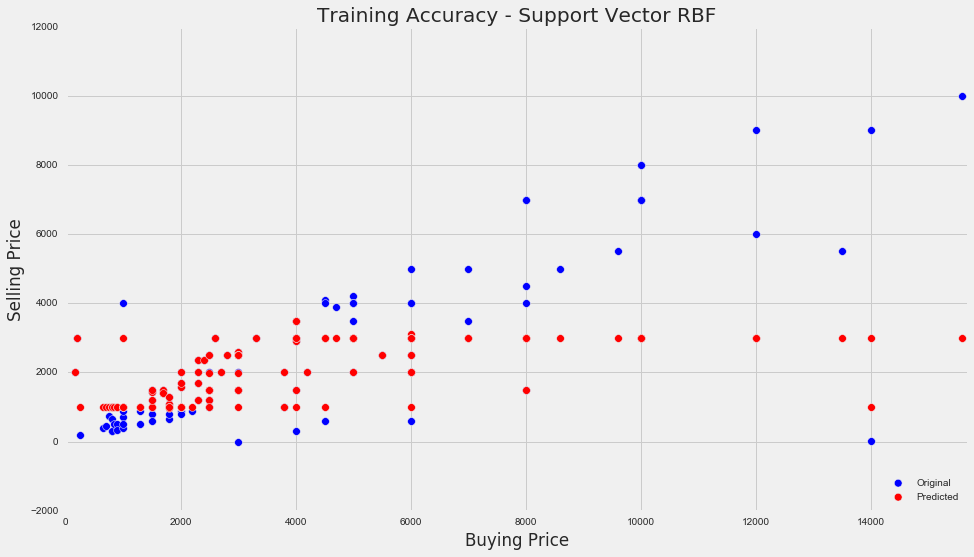

In [55]:
regmod = SVR(kernel='rbf', C=1e3, gamma=0.1)
scores = cross_validation.cross_val_score(regmod,df_X,  y, scoring='mean_squared_error',cv=20)
print "SVR RBF, Mean: %s, STD: %s" %(scores.mean(), scores.std())
y_regmod = regmod.fit(df_X, y).predict(df_X)
plt.scatter(df_X.Buying_Price,y,c='b',s = 60, label="Original")
plt.scatter(df_X.Buying_Price,y_regmod,c='r',s = 60, label="Predicted")
plt.xlim([0,max(y)+100])
plt.xlim([0,df.Buying_Price.max()+100])

plt.legend(loc=4)
plt.xlabel("Buying Price")
plt.ylabel("Selling Price")
plt.title("Training Accuracy - Support Vector RBF")

## Bonus expolorations, Seaborn

In [39]:
import seaborn as sns
sns.set()

/Users/vima/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


/Users/vima/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


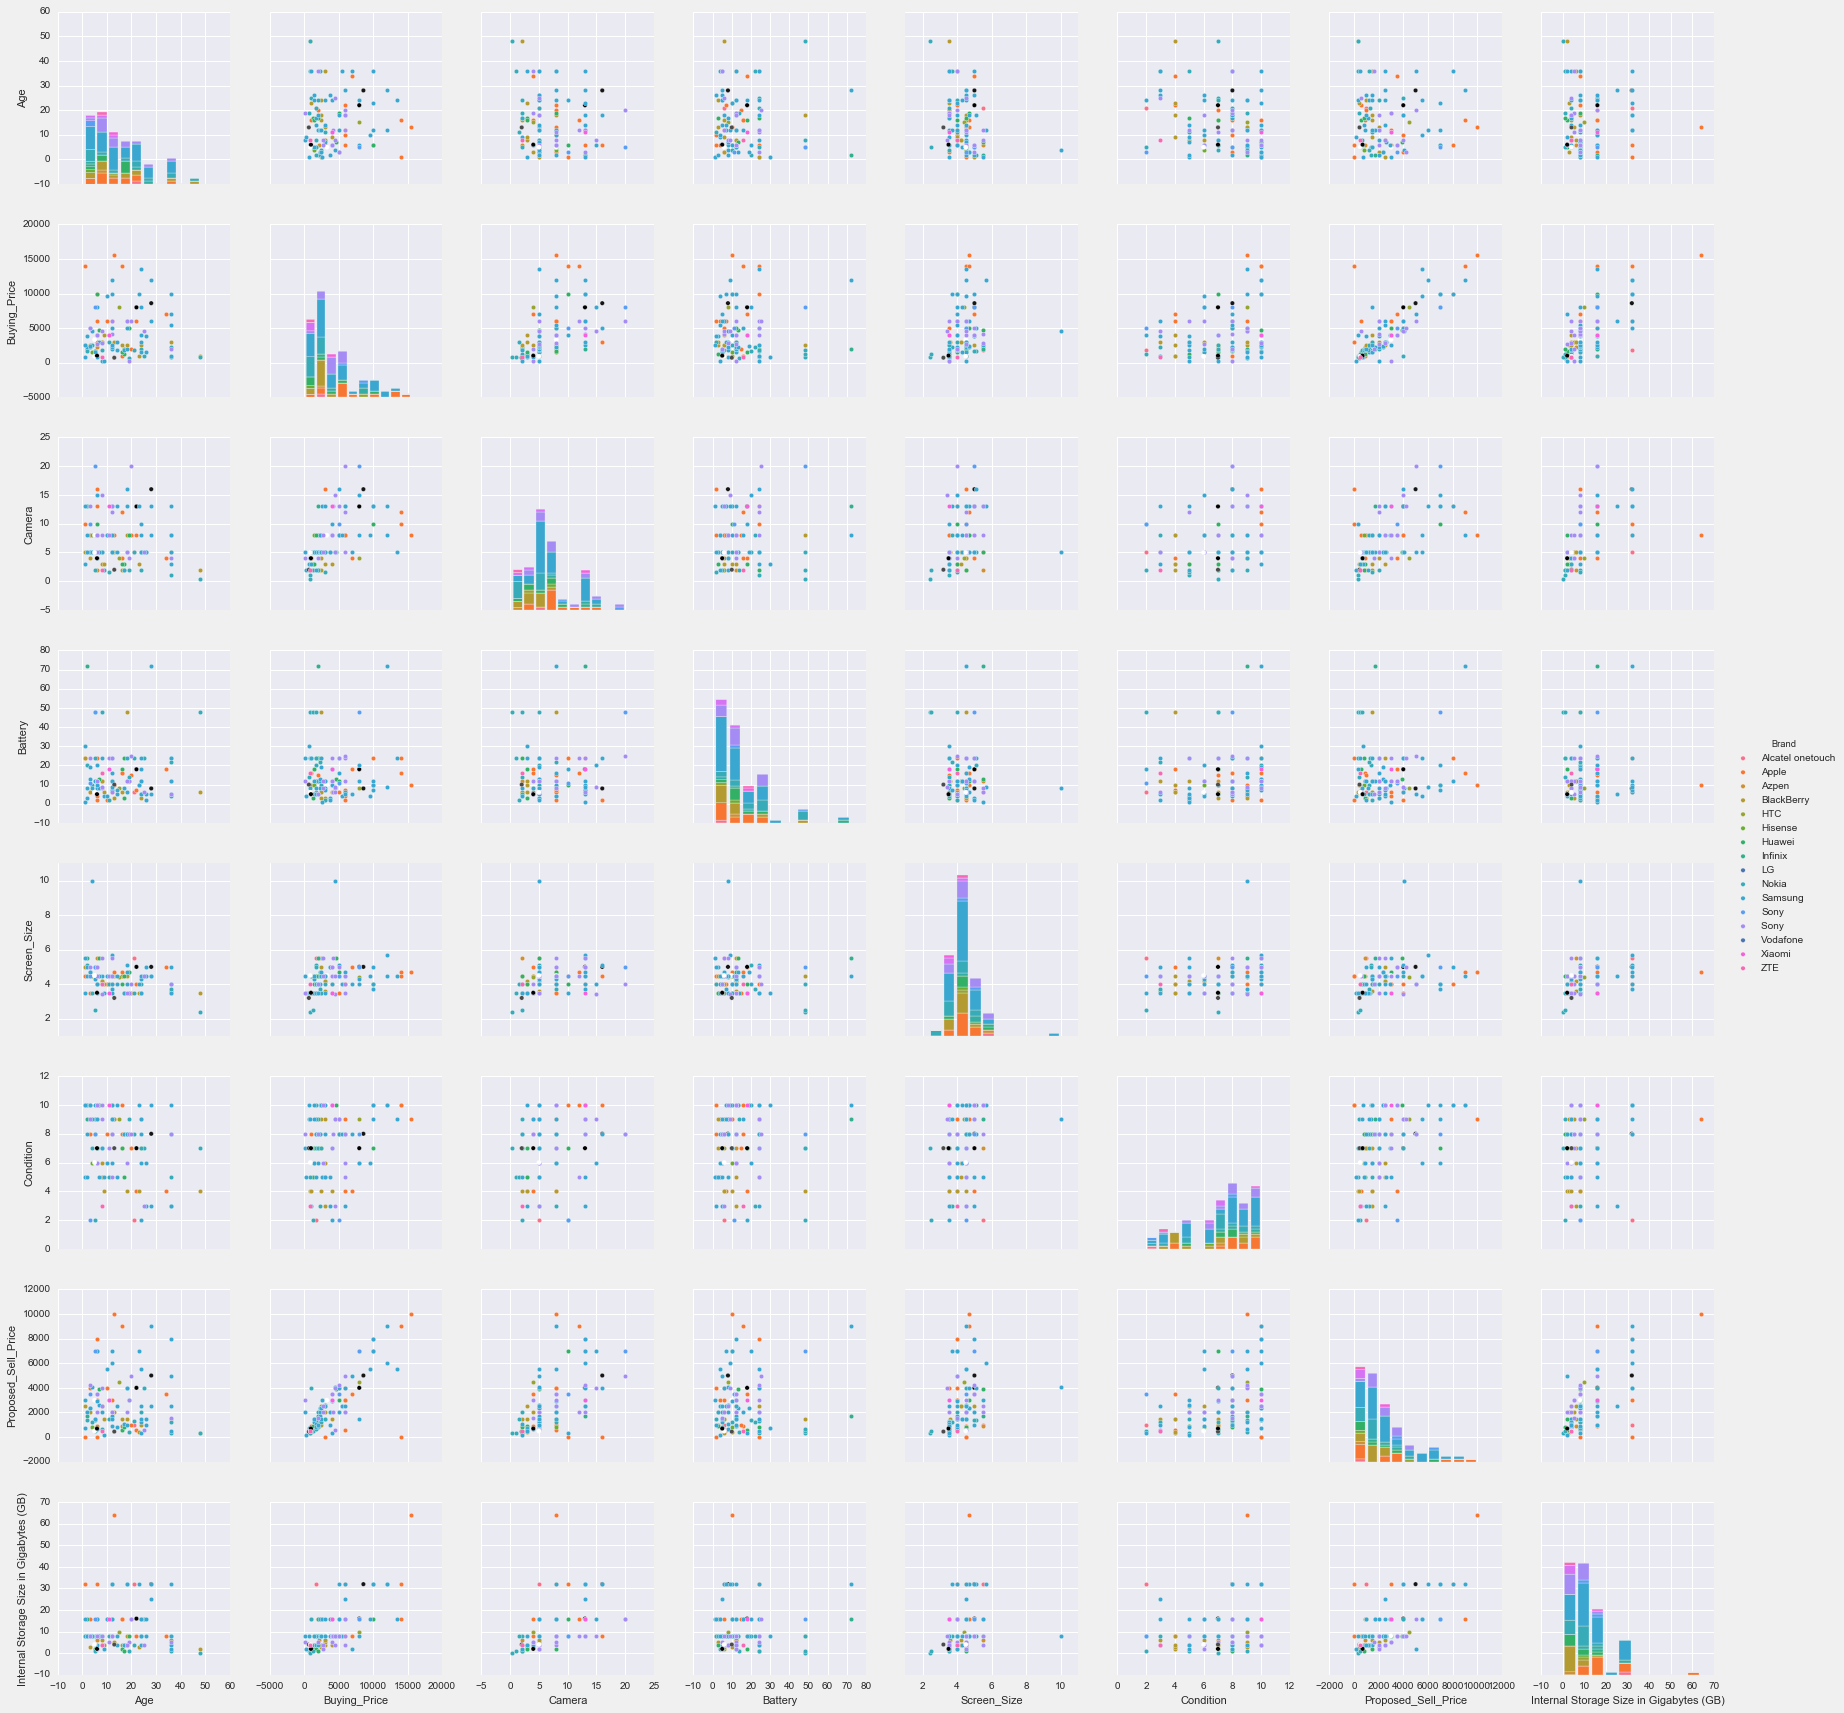

In [40]:
sns.pairplot(df, hue="Brand")